# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [6]:
dataset = pd.read_csv("../data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

In [7]:
dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [8]:
dataset.TARGET.value_counts()

0    1545
1     309
Name: TARGET, dtype: int64

1) Los datos están estructurados en una serie de variables obtenidas de clientes del departamento de créditos de un banco. Proporcionan datos relevantes sobre los préstamos otorgados, categorizando los mismos según hayan caído en default o no. 

2) La variable target etiqueta aquellos prestamos que han sido pagados y los que no(default). El valor 0 se corresponde con aquellos que han pagado el préstamo, mientras que si toma valor 1 es porque han incumplido.

3)Atributos disponibles:

    -LOAN: monto del préstamo solicitado.
    -MORTDUE: Monto adeudado de la hipoteca existente.
    -VALUE: valor de la propiedad actual.
    -YOJ: cantidad de años en el trabajo actual.
    -DEROG: Número de informes derogativos.
    -DELINQ: Número de líneas de crédito morosas.
    -CLAGE: Antigüedad de la línea comercial más antigua en meses.
    -NINQ:
    -CLNO: 
    -DEBTINC: 

4) LOAN - DEROG - DELINQ


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


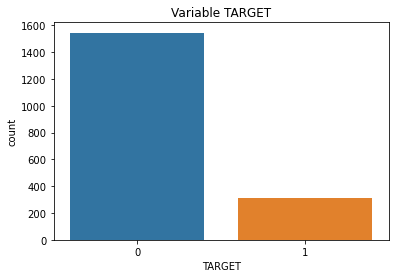

In [26]:
sns.countplot(dataset.TARGET)
plt.title("Variable TARGET")
plt.show()

La variable objetivo esta muy desbalanceada.

In [20]:
classifier=SGDClassifier(random_state=42)

classifier.fit(X_train,y_train)

y_pred_train=classifier.predict(X_train)
y_pred_test=classifier.predict(X_test)

print("ENTRENAMIENTO")
print(classification_report(y_train, y_pred_train))

print("TESTEO")
print(classification_report(y_test, y_pred_test))

ENTRENAMIENTO
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1232
           1       0.00      0.00      0.00       251

    accuracy                           0.83      1483
   macro avg       0.42      0.50      0.45      1483
weighted avg       0.69      0.83      0.75      1483

TESTEO
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

    accuracy                           0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371



C:\Users\arrua\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


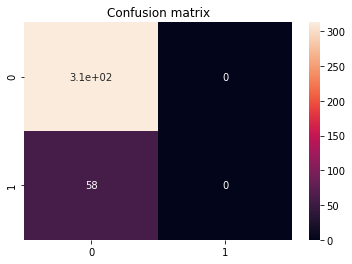

In [24]:
cm=confusion_matrix(y_test,y_pred_test)

sns.heatmap(cm, annot=True)

plt.title("Confusion matrix")
plt.show()

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [44]:
params={'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'alpha':[0.1,0.01,0.001,0.0001],
        'learning_rate': ['optimal','constant','invscaling','adaptive'],
        'eta0': [0.01,0.001,0.0001]}

grid=GridSearchCV(classifier,param_grid=params,cv=5,n_jobs=-1,scoring='accuracy',refit=True)

grid.fit(X_train,y_train)

print("El mejor es: %f con %s" % (grid.best_score_, grid.best_params_))
means_acc= grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means_acc, stds, params):
    print("%f (%f) con: %r" % (mean, stdev, param))

El mejor es: 0.830749 con {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'squared_hinge'}
0.696067 (0.262193) con: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'hinge'}
0.564310 (0.321709) con: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'log'}
0.564310 (0.321709) con: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'modified_huber'}
0.700783 (0.259485) con: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'squared_hinge'}
0.696067 (0.262193) con: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'perceptron'}
0.691355 (0.257091) con: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge'}
0.699434 (0.260496) con: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'log'}
0.699434 (0.260496) con: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'modified_huber'}
0.830749 (0.001259) con: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate'

In [46]:
y_pred_train=grid.predict(X_train)
y_pred_test=grid.predict(X_test)

print("ENTRENAMIENTO")
print(classification_report(y_train, y_pred_train))

print("TESTEO")
print(classification_report(y_test, y_pred_test))

ENTRENAMIENTO
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1232
           1       0.00      0.00      0.00       251

    accuracy                           0.83      1483
   macro avg       0.42      0.50      0.45      1483
weighted avg       0.69      0.83      0.75      1483

TESTEO
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

    accuracy                           0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371



C:\Users\arrua\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


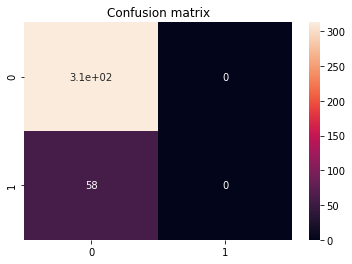

In [47]:
cm=confusion_matrix(y_test,y_pred_test)

sns.heatmap(cm, annot=True)

plt.title("Confusion matrix")
plt.show()

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html